In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataset= pd.read_excel("Book10.xlsx")
dataset.head(6)

,sl,sw,pl,pw
0,4.7,3.000000,1.3,0.2
1,4.9,3.200000,1.4,0.2
2,5.1,3.500000,1.5,0.2
3,5.3,3.733333,1.6,0.2
4,5.5,3.983333,1.7,0.2
5,5.7,4.233333,1.8,0.2


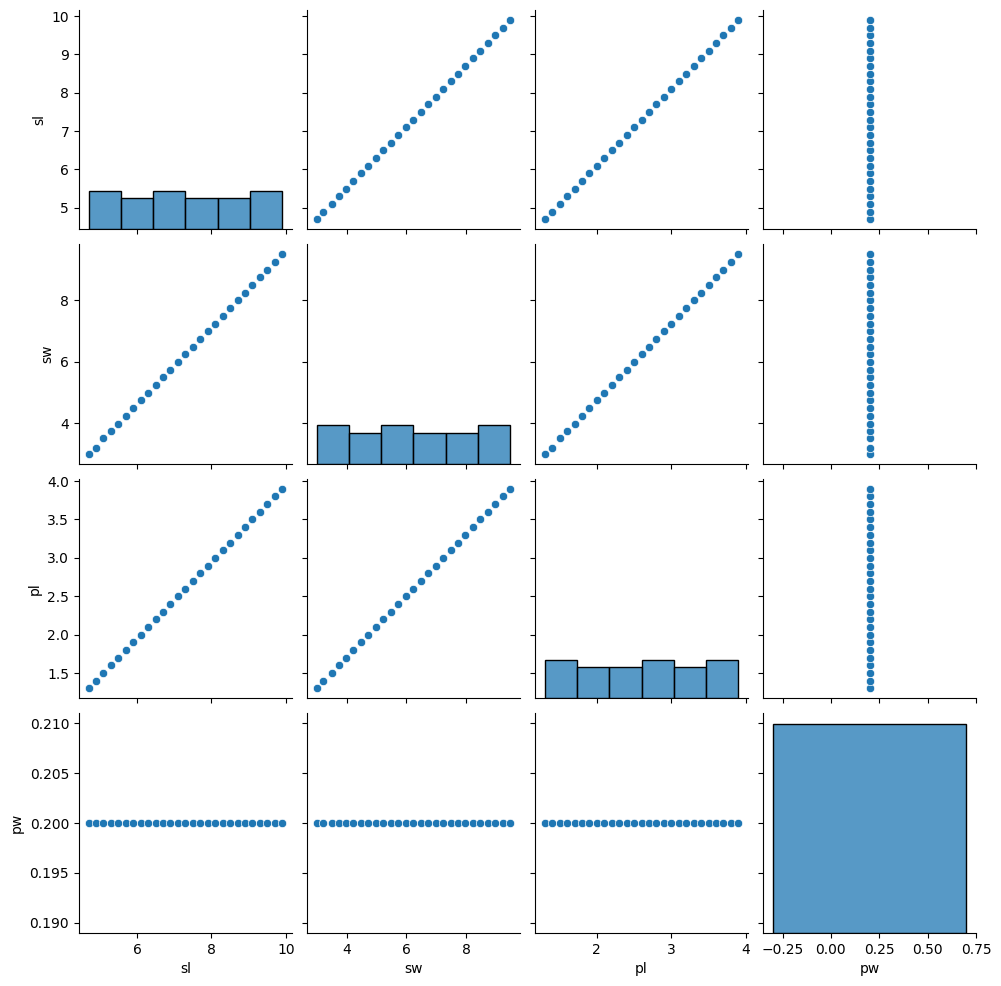

In [4]:
sns.pairplot(data=dataset)
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss=[]
for i in range(2,21):
    km= KMeans(n_clusters=i,init="k-means++")
    km.fit(dataset)
    wcss.append(km.inertia_)

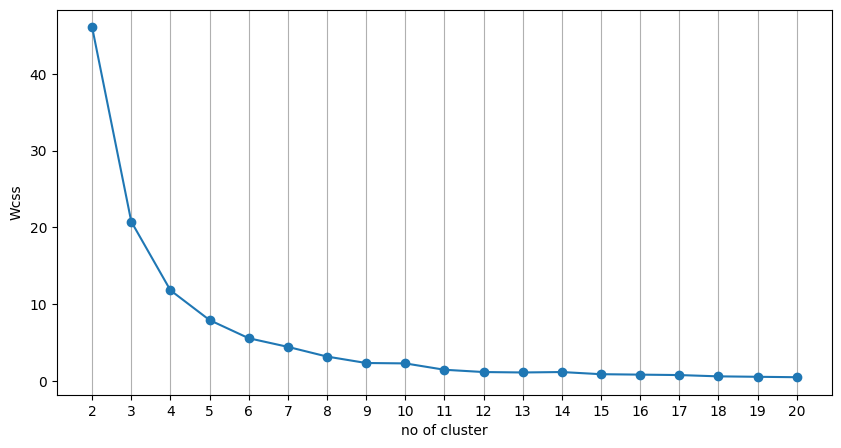

In [7]:
from matplotlib import markers


plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss,marker="o")
plt.xlabel("no of cluster")
plt.xticks([i for i in range(2,21)])
plt.ylabel("Wcss")
plt.grid(axis="x")
plt.show()


In [8]:
kmn=KMeans(n_clusters=3)
dataset["predict"]=kmn.fit_predict(dataset)

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [12]:
silhouette_score(dataset,labels=kmn.labels_)*100

62.4090957953363

In [21]:
dataset.head(5)

,sl,sw,pl,pw,predict
0,4.7,3.000000,1.3,0.2,0
1,4.9,3.200000,1.4,0.2,0
2,5.1,3.500000,1.5,0.2,0
3,5.3,3.733333,1.6,0.2,0
4,5.5,3.983333,1.7,0.2,0


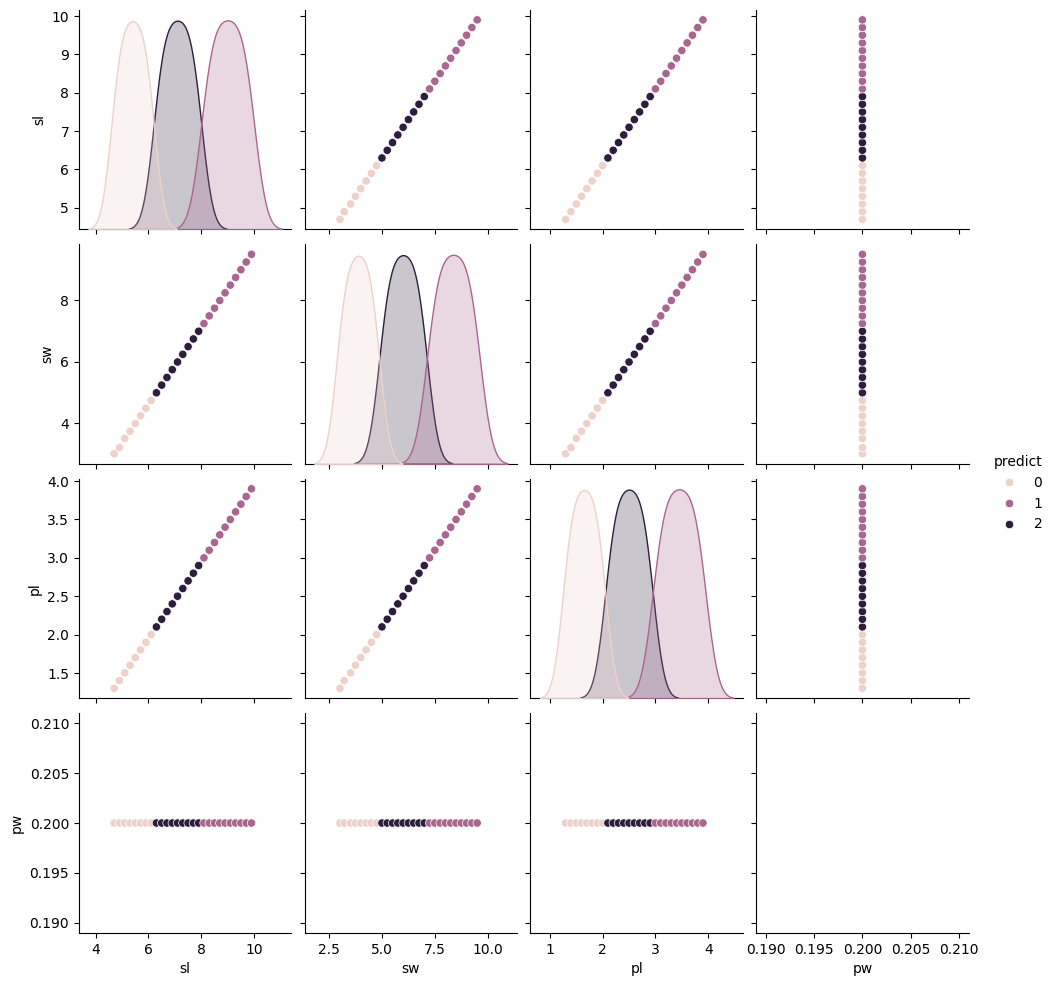

In [22]:
sns.pairplot(data=dataset,hue="predict")
plt.show()

In [23]:
org=pd.read_excel("Book7.xlsx")
org.head(5)

,sl,sw,pl,pw,sp
0,4.7,3.000000,1.3,0.2,setosa
1,4.9,3.200000,1.4,0.2,setosa
2,5.1,3.500000,1.5,0.2,setosa
3,5.3,3.733333,1.6,0.2,setosa
4,5.5,3.983333,1.7,0.2,setosa


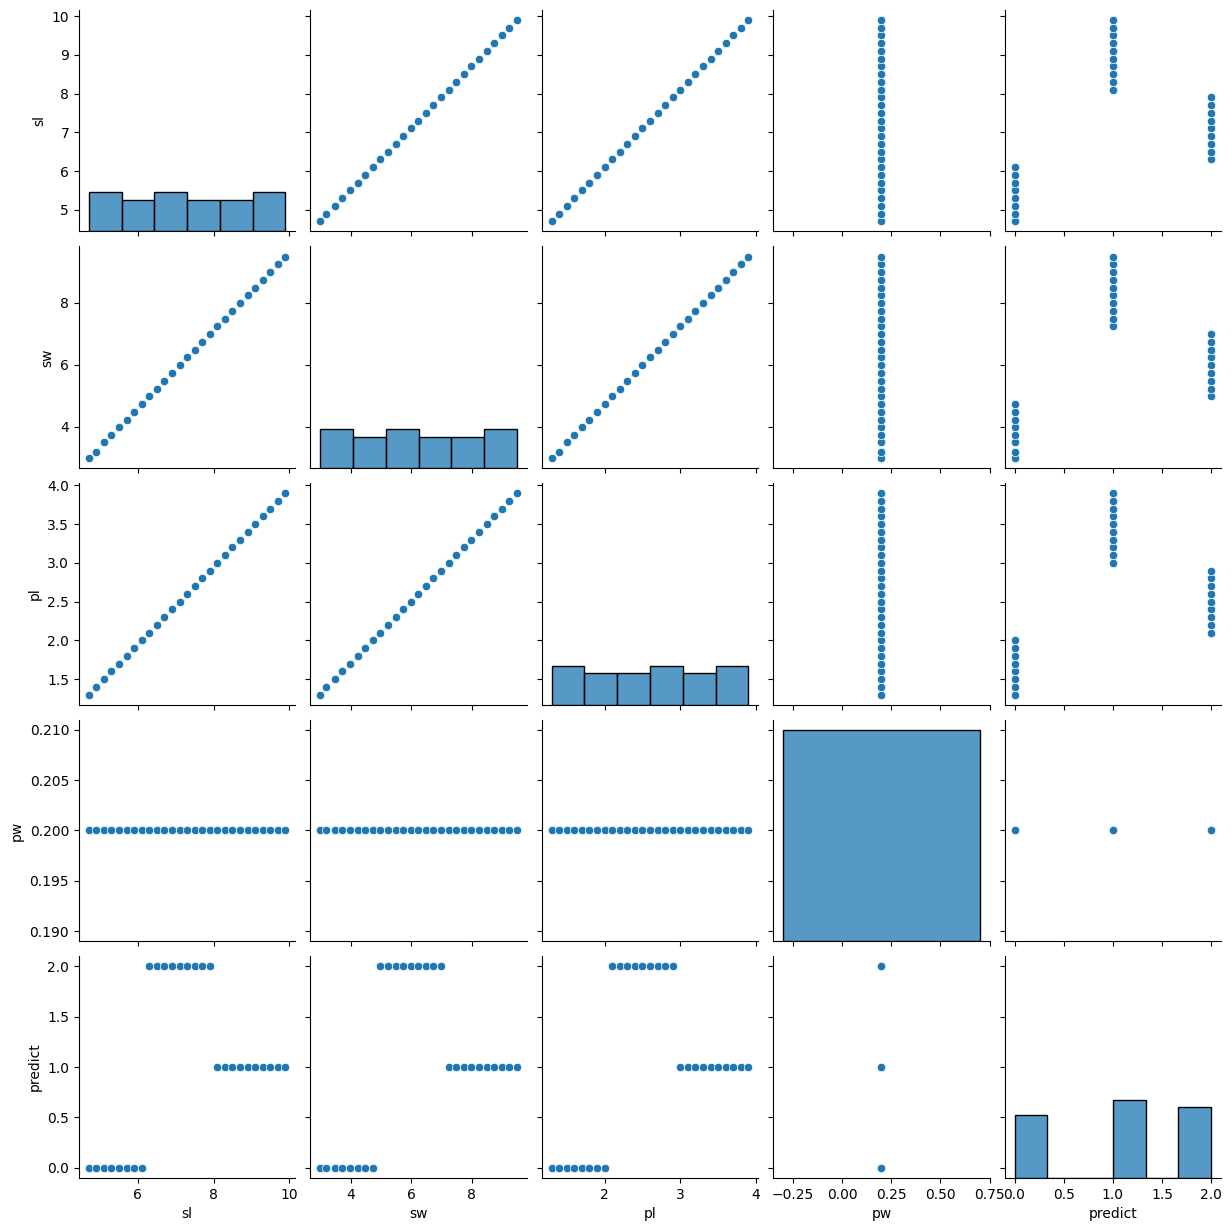

In [27]:
sns.pairplot(data=dataset)
plt.show()

In [28]:
import scipy.cluster.hierarchy as sc

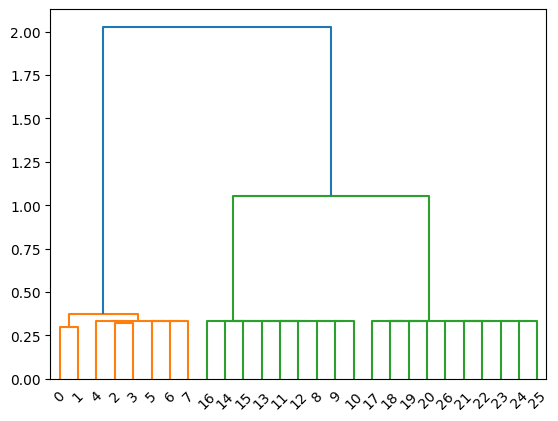

In [29]:
sc.dendrogram(sc.linkage(dataset,method="single", metric="euclidean"))
plt.show()

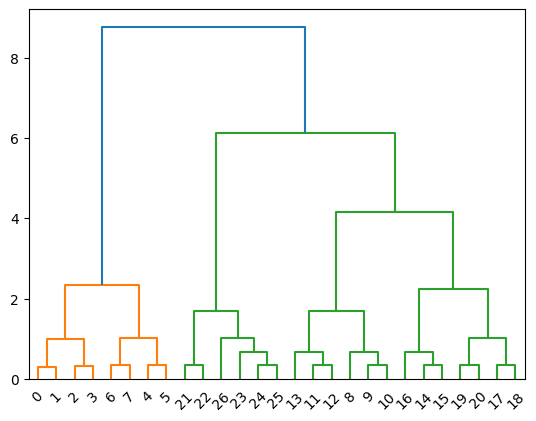

In [30]:
sc.dendrogram(sc.linkage(dataset,method="complete", metric="euclidean"))
plt.show()

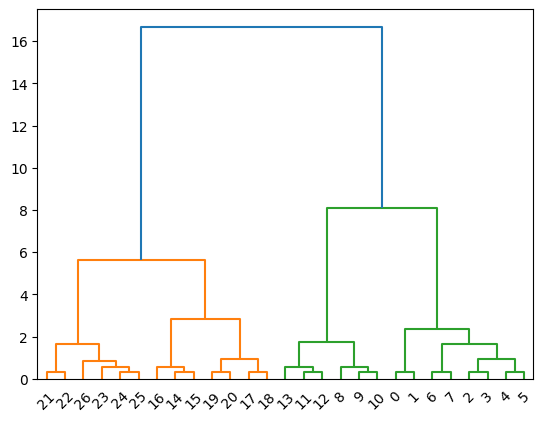

In [31]:
sc.dendrogram(sc.linkage(dataset,method="ward", metric="euclidean"))
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
ac=AgglomerativeClustering(n_clusters=2,linkage="single")
dataset["predict"]= ac.fit_predict(dataset)
dataset.head(4)

,sl,sw,pl,pw,predict
0,4.7,3.000000,1.3,0.2,0
1,4.9,3.200000,1.4,0.2,0
2,5.1,3.500000,1.5,0.2,0
3,5.3,3.733333,1.6,0.2,0


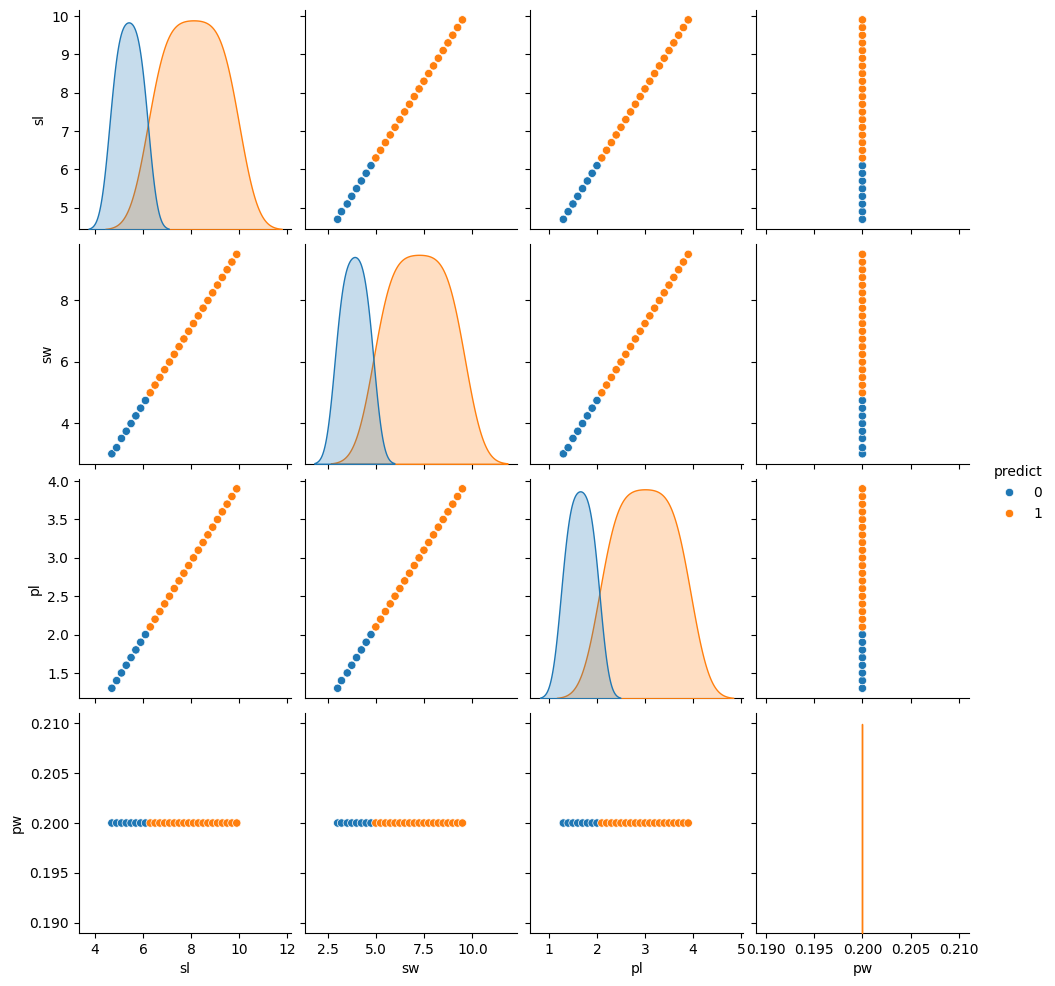

In [35]:
sns.pairplot(data=dataset,hue="predict")
plt.show()

In [14]:
ss=[]
no_c=[j for j in range(2,21)]
for i in range(2,21):
    km1= KMeans(n_clusters=i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset,km1.labels_))

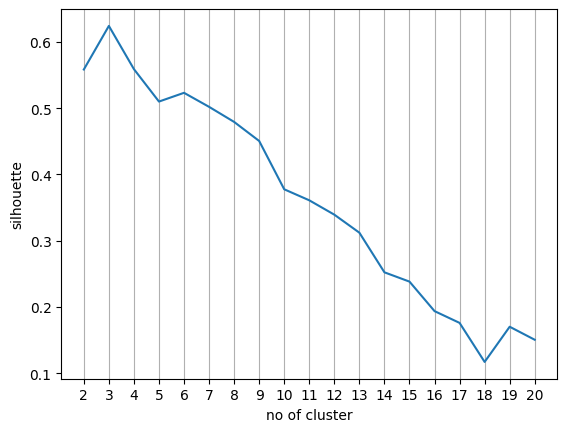

In [18]:
plt.plot(no_c,ss)
plt.xlabel("no of cluster")
plt.ylabel("silhouette")
plt.xticks(no_c)
plt.grid(axis="x")
plt.show()